# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by [Prajna Bhandary](https://www.linkedin.com/in/prajna-bhandary-0b03a416a/) and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)

![dataset.png](attachment:dataset.png)

In [2]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
data_path='/content/drive/My Drive/face-mask-detector/face-mask-detector/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            resized=cv2.resize(gray,(img_size,img_size))
            #appending the image and the label(categorized) into the list (dataset)
            data.append(resized)
            target.append(label_dict[category])
            
            #if any exception rasied, the exception will be printed here. And pass to the next image
        except Exception as e:
            print('Exception:',e)
            

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)

In [7]:
new_target.shape

(1376, 2)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [8]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [9]:
data.shape

(1376, 100, 100, 1)

In [10]:
data.shape[1:]

(100, 100, 1)

In [11]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=100,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5475WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 80s 3s/step - loss: 0.6859 - accuracy: 0.5475 - val_loss: 0.6271 - val_accuracy: 0.5645
Epoch 2/100
31/31 [==============================] - 76s 2s/step - loss: 0.5120 - accuracy: 0.7545 - val_loss: 0.3527 - val_accuracy: 0.8589
Epoch 3/100
31/31 [==============================] - 76s 2s/step - loss: 0.3504 - accuracy: 0.8475 - val_l

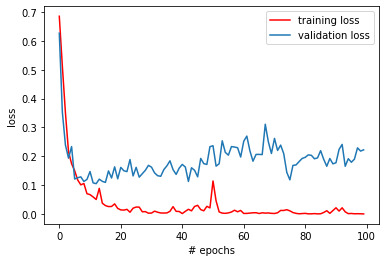

In [16]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

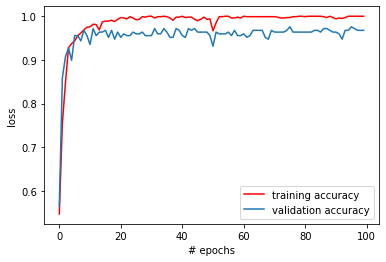

In [17]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 438ms/step - loss: 0.1175 - accuracy: 0.9565
[0.11749015003442764, 0.95652174949646]
